<a href="https://colab.research.google.com/github/Kiron-Ang/Vaccination/blob/main/vaccination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Print R version
R.version.string

# Install RSocrata
# github.com/chicago/rsocrata
install.packages("RSocrata")

# Install ggplot2
install.packages("ggplot2")

[1] "R version 4.4.2 (2024-10-31)"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Load RSocrata
library("RSocrata")

# Load ggplot2
library(ggplot2)

# Set plot width and plot height
options(repr.plot.width=15, repr.plot.height=15)

# Read data
# dev.socrata.com/foundry/data.cdc.gov/ee48-w5t6
# data.cdc.gov/Teen-Vaccinations/Vaccination-Coverage-among-Adolescents-13-17-Years/ee48-w5t6
data = read.socrata("https://data.cdc.gov/resource/ee48-w5t6.json")

# Print data dimensions
dim(data)

# Print first 6 data lines
head(data)

[1] 27565    10

,vaccine,dose,geography_type,geography,year_season,dimension_type,dimension,coverage_estimate,X_95_ci,population_sample_size
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,HPV,"≥1 Dose, Males",States/Local Areas,New York,2023,Age,13-17 Years,81.5,75.2 to 86.5,289
2,Tetanus,≥1 Dose Tdap,States/Local Areas,New York,2023,Age,13-17 Years,90.2,86.8 to 92.8,559
3,Tetanus,≥1 Dose Td or Tdap,States/Local Areas,New York,2023,Age,13-17 Years,93.6,90.9 to 95.5,559
4,≥1 Dose MenACWY,,States/Local Areas,New York,2023,Age,13-17 Years,95.3,92.7 to 97.0,559
5,HPV,"≥1 Dose, Males and Females",States/Local Areas,New York,2023,Age,13-17 Years,79.4,74.8 to 83.3,559
6,HPV,"Up-to-Date, Males",States/Local Areas,New York,2023,Age,13-17 Years,67.8,60.8 to 74.2,289


In [3]:
# Create a logical vector to identify where coercion will result in NA
# BEFORE actually converting the column to numeric
problematic_values = is.na(as.numeric(data$coverage_estimate))

# Show the original values that became NA and see if they are relevant
data[problematic_values, ]

Warning message:
“NAs introduced by coercion”


,vaccine,dose,geography_type,geography,year_season,dimension_type,dimension,coverage_estimate,X_95_ci,population_sample_size
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2572,HPV,"Up-to-Date, Females",States/Local Areas,U.S. Virgin Islands,2018,Age,13-15 Years,NA,NA,NA
2656,HPV,"Up-to-Date, Males",States/Local Areas,U.S. Virgin Islands,2018,Age,13-15 Years,NA,NA,NA
16629,HPV,"≥1 Dose, Males",HHS Regions/National,United States,2009,Age,13-17 Years,NA,NA,NA
16736,HPV,"≥2 Doses, Males",HHS Regions/National,United States,2009,Age,13-17 Years,NA,NA,NA
16994,HPV,"Up-to-Date, Males",States/Local Areas,Puerto Rico,2018,Age,13-15 Years,NA,NA,NA
17023,HPV,"Up-to-Date, Females",States/Local Areas,Puerto Rico,2018,Age,13-15 Years,NA,NA,NA
19245,HPV,"Up-to-Date, Males",States/Local Areas,TX-Dallas County,2018,Age,13-15 Years,NA,NA,NA
19256,HPV,"Up-to-Date, Females",States/Local Areas,TX-Dallas County,2018,Age,13-15 Years,NA,NA,NA
19421,HPV,"Up-to-Date, Males",States/Local Areas,TX-El Paso County,2018,Age,13-15 Years,NA,NA,NA


In [4]:
# Not relevant because we are not using that age range. Move onwards!
# Convert coverage_estimate to numeric
data$coverage_estimate = as.numeric(data$coverage_estimate)

# Print unique vaccines
unique(data$vaccine)

Warning message:
“NAs introduced by coercion”


[1] "HPV"             "Tetanus"         "≥1 Dose MenACWY" "≥3 Doses HepB"  
[5] "≥2 Doses MMR"    "Varicella"       "≥2 Doses Hep A"

In [5]:
# Filter data
data = data[data$vaccine %in% c("HPV", "Tetanus", "≥1 Dose MenACWY"), ]

# Print data dimensions
dim(data)

[1] 18953    10

In [6]:
# Print vaccines and doses in order
unique(data[c("vaccine", "dose")][order(data$vaccine), ])

,vaccine,dose
,<chr>,<chr>
4,≥1 Dose MenACWY,
1,HPV,"≥1 Dose, Males"
5,HPV,"≥1 Dose, Males and Females"
6,HPV,"Up-to-Date, Males"
7,HPV,"≥1 Dose, Females"
8,HPV,"Up-to-Date, Males and Females"
19,HPV,"Up-to-Date, Females"
23,HPV,"≥2 Doses, Females"
82,HPV,"≥3 Doses, Females"


In [7]:
# Print unique dimension types
unique(data$dimension_type)

[1] "Age"                "Insurance Coverage" "Poverty"           
[4] "Race and Ethnicity" "Urbanicity"         "Overall"

In [8]:
# Filter data
data = data[data$dimension_type == "Age", ]

# Print data dimensions
dim(data)

[1] 15715    10

In [9]:
# Print unique dimensions
unique(data$dimension)

[1] "13-17 Years" "13-15 Years"

In [10]:
# Filter data
data = data[data$dimension == "13-17 Years", ]

# Print data dimensions
dim(data)

[1] 11294    10

In [11]:
# Print first 6 data lines
head(data)

,vaccine,dose,geography_type,geography,year_season,dimension_type,dimension,coverage_estimate,X_95_ci,population_sample_size
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,HPV,"≥1 Dose, Males",States/Local Areas,New York,2023,Age,13-17 Years,81.5,75.2 to 86.5,289
2,Tetanus,≥1 Dose Tdap,States/Local Areas,New York,2023,Age,13-17 Years,90.2,86.8 to 92.8,559
3,Tetanus,≥1 Dose Td or Tdap,States/Local Areas,New York,2023,Age,13-17 Years,93.6,90.9 to 95.5,559
4,≥1 Dose MenACWY,,States/Local Areas,New York,2023,Age,13-17 Years,95.3,92.7 to 97.0,559
5,HPV,"≥1 Dose, Males and Females",States/Local Areas,New York,2023,Age,13-17 Years,79.4,74.8 to 83.3,559
6,HPV,"Up-to-Date, Males",States/Local Areas,New York,2023,Age,13-17 Years,67.8,60.8 to 74.2,289


In [12]:
# Print unique geography types
unique(data$geography_type)

[1] "States/Local Areas"   "HHS Regions/National"

In [13]:
# Filter data
data = data[data$geography_type == "States/Local Areas", ]

# Print data dimensions
dim(data)

[1] 9507   10

In [14]:
# Print unique geographies
unique(data$geography)

[1] "New York"             "New Hampshire"        "Colorado"            
 [4] "Nebraska"             "IL-Rest of state"     "IL-City of Chicago"  
 [7] "PA-Philadelphia"      "PA-Rest of state"     "U.S. Virgin Islands" 
[10] "TX-Rest of state"     "Minnesota"            "Florida"             
[13] "Oklahoma"             "Nevada"               "Mississippi"         
[16] "Montana"              "Tennessee"            "Missouri"            
[19] "Washington"           "Guam"                 "Maine"               
[22] "Kansas"               "Alabama"              "Utah"                
[25] "California"           "Alaska"               "Kentucky"            
[28] "Delaware"             "Texas"                "Idaho"               
[31] "Virginia"             "Iowa"                 "Hawaii"              
[34] "Wyoming"              "Arkansas"             "Georgia"             
[37] "South Dakota"         "Connecticut"          "Oregon"              
[40] "Rhode Island"         "New Mexico"           "Michigan"            
[43] "Louisiana"            "West Virginia"        "Massachusetts"       
[46] "District of Columbia" "TX-City of Houston"   "TX-Bexar County"     
[49] "Pennsylvania"         "North Carolina"       "Puerto Rico"         
[52] "Maryland"             "New Jersey"           "NY-City of New York" 
[55] "NY-Rest of state"     "North Dakota"         "TX-Dallas County"    
[58] "TX-El Paso County"    "TX-Tarrant County"    "TX-Hidalgo County"   
[61] "TX-Travis County"     "Wisconsin"            "Illinois"            
[64] "Ohio"                 "Arizona"              "South Carolina"      
[67] "Indiana"              "Vermont"

In [15]:
# List of all 50 states and the District of Columbia
# These are areas with electoral college votes in the 2024 election
# www.archives.gov/electoral-college/2024
states = c("Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
            "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana",
            "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts",
            "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
            "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
            "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
            "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
            "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", "District of Columbia")

# Filter data for all 50 states and the District of Columbia
data = data[data$geography %in% states, ]

# Print data dimensions
dim(data)

[1] 7702   10

In [16]:
# Print unique year seasons
unique(data$year_season)

[1] "2023" "2022" "2020" "2018" "2019" "2021" "2014" "2015" "2013" "2017"
[11] "2016" "2011" "2012" "2010" "2008" "2009"

In [17]:
# HPV data
hpv = data[data$vaccine == "HPV" & data$dose == "≥1 Dose, Males and Females", ]

# Print HPV data dimensions
dim(hpv)

# MenACWY data
menacwy = data[data$vaccine == "≥1 Dose MenACWY", ]

# Print MenACWY data dimensions
dim(menacwy)

# Tetanus data
tetanus = data[data$vaccine == "Tetanus" & data$dose == "≥1 Dose Td or Tdap", ]

# Print Tetanus data dimensions
dim(tetanus)

[1] 408  10

[1] 816  10

[1] 816  10

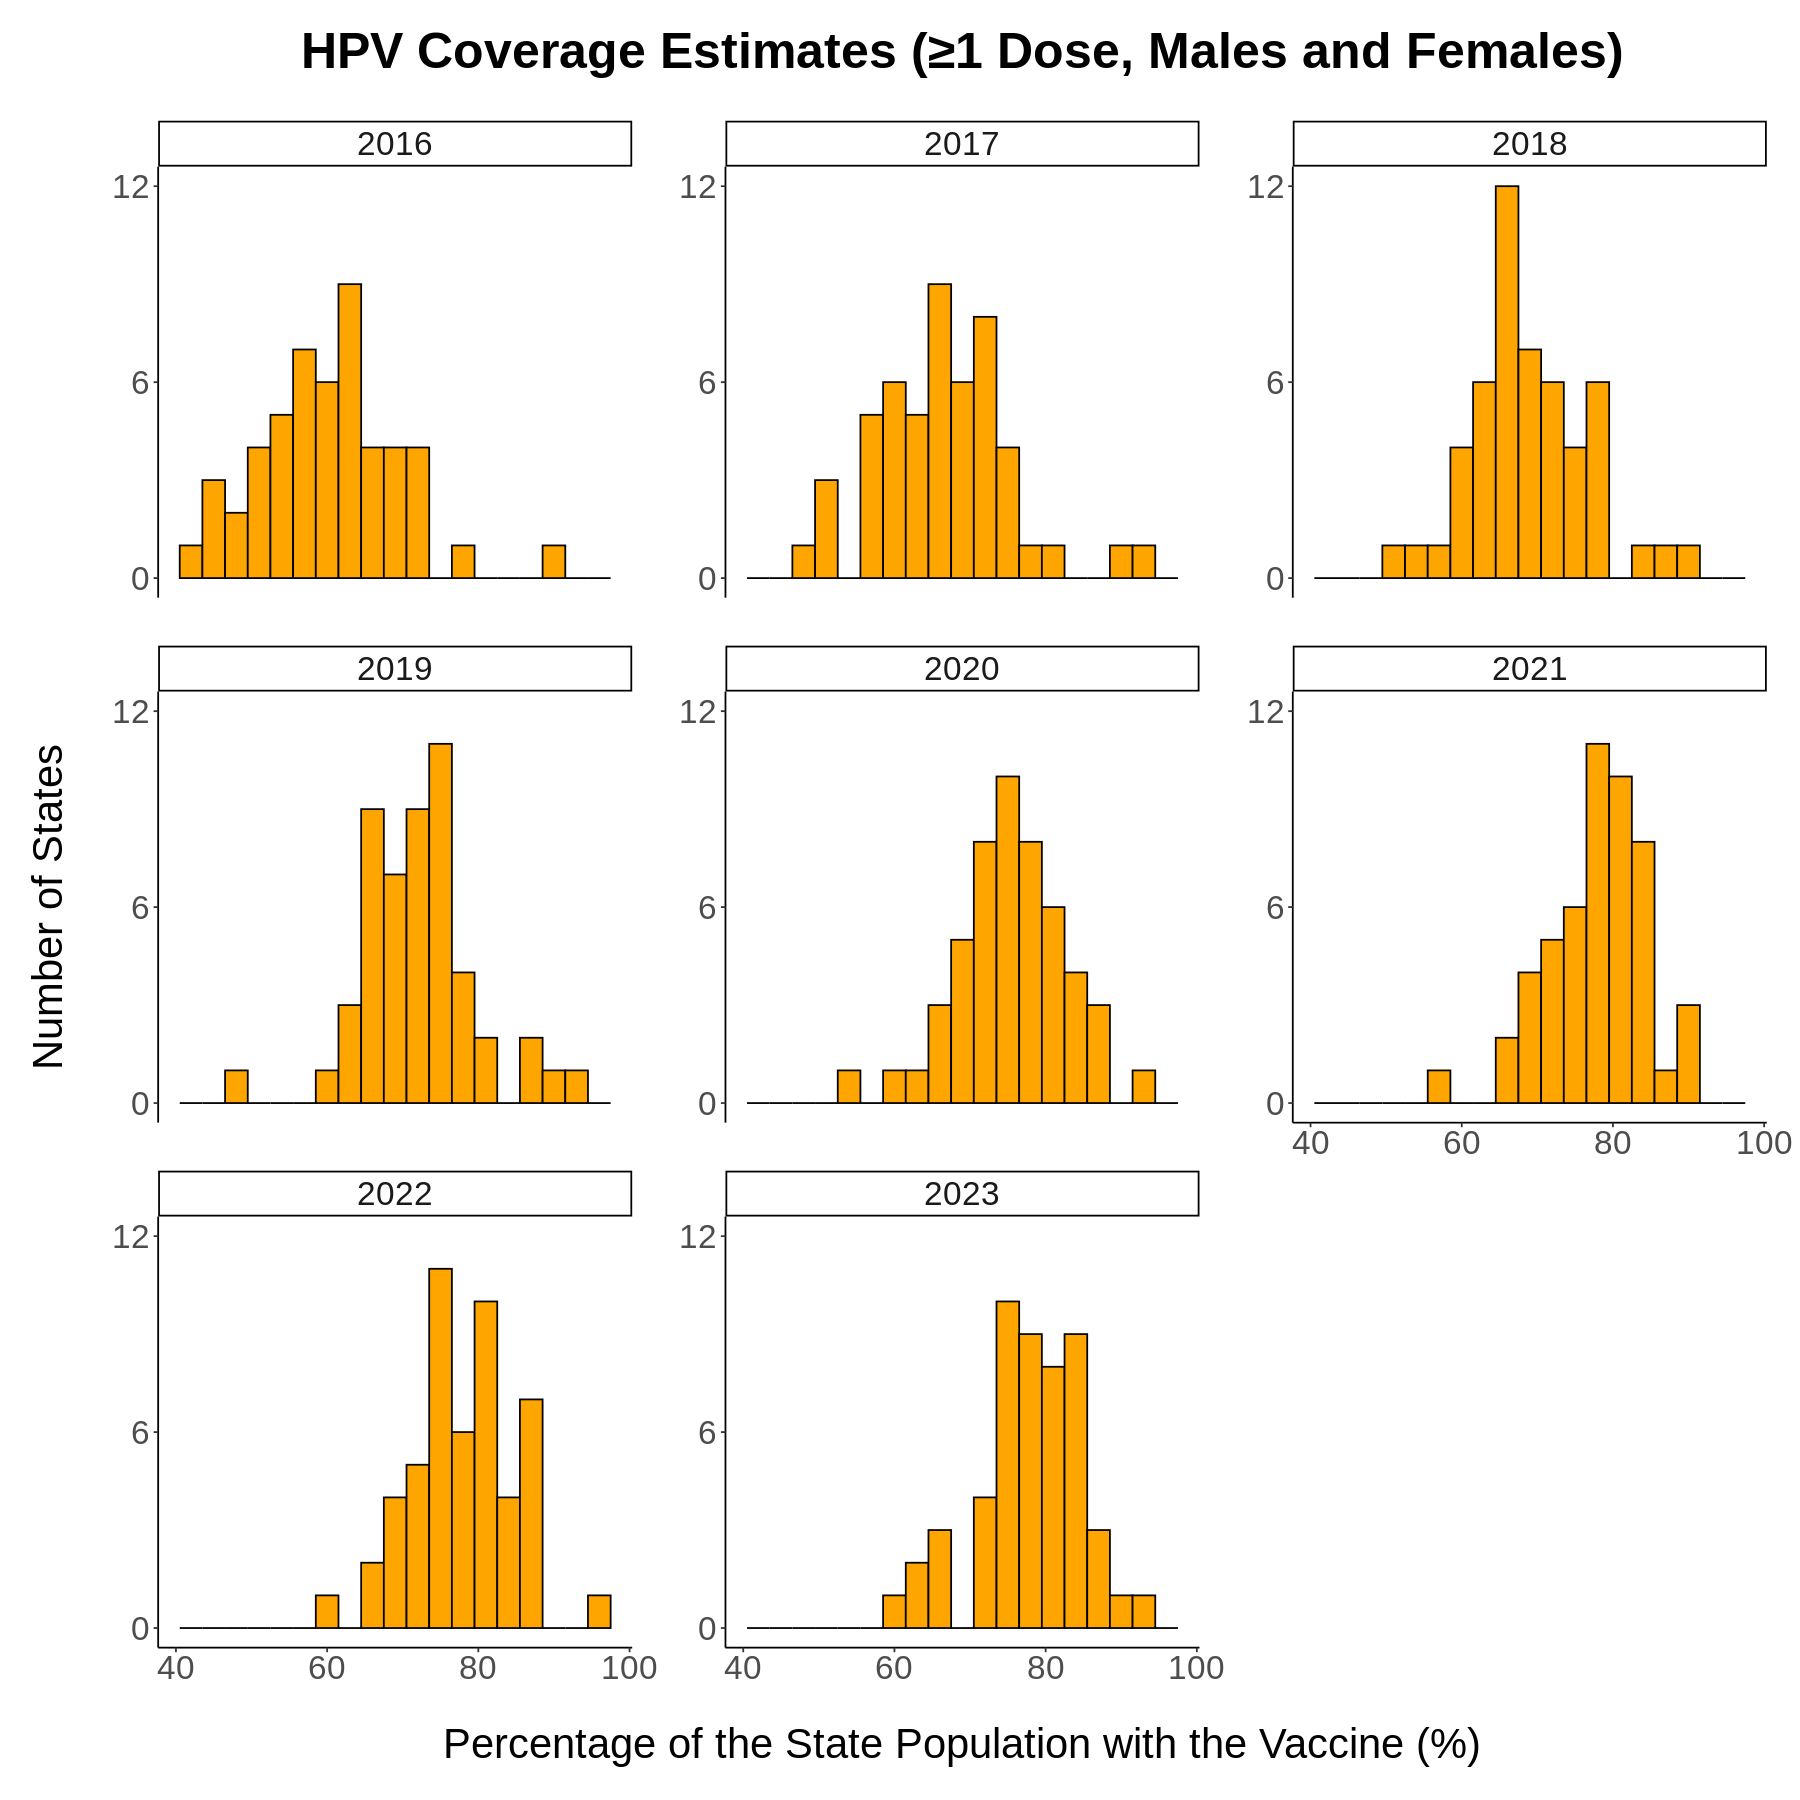

In [18]:
# Create HPV histograms with discrete y-axis
ggplot(hpv, aes(x = coverage_estimate)) +
  geom_histogram(binwidth = 3, fill = "orange", color = "black") +
  labs(title = "HPV Coverage Estimates (≥1 Dose, Males and Females)",
       x = "Percentage of the State Population with the Vaccine (%)",
       y = "Number of States") +
  theme_classic() +
  theme(text = element_text(size = 25),
        plot.title = element_text(hjust = 0.5, face = "bold", margin = margin(b = 25)),
        panel.spacing = unit(2, "lines"),
        plot.margin = margin(20, 20, 20, 20),
        axis.title.x = element_text(margin = margin(t = 25)),
        axis.title.y = element_text(margin = margin(r = 25))) +
  facet_wrap(~ year_season, scales = "free_y") +
  scale_y_continuous(breaks = c(0, 6, 12),
                     limits = c(0, 12),
                     labels = c("0", "6", "12"))

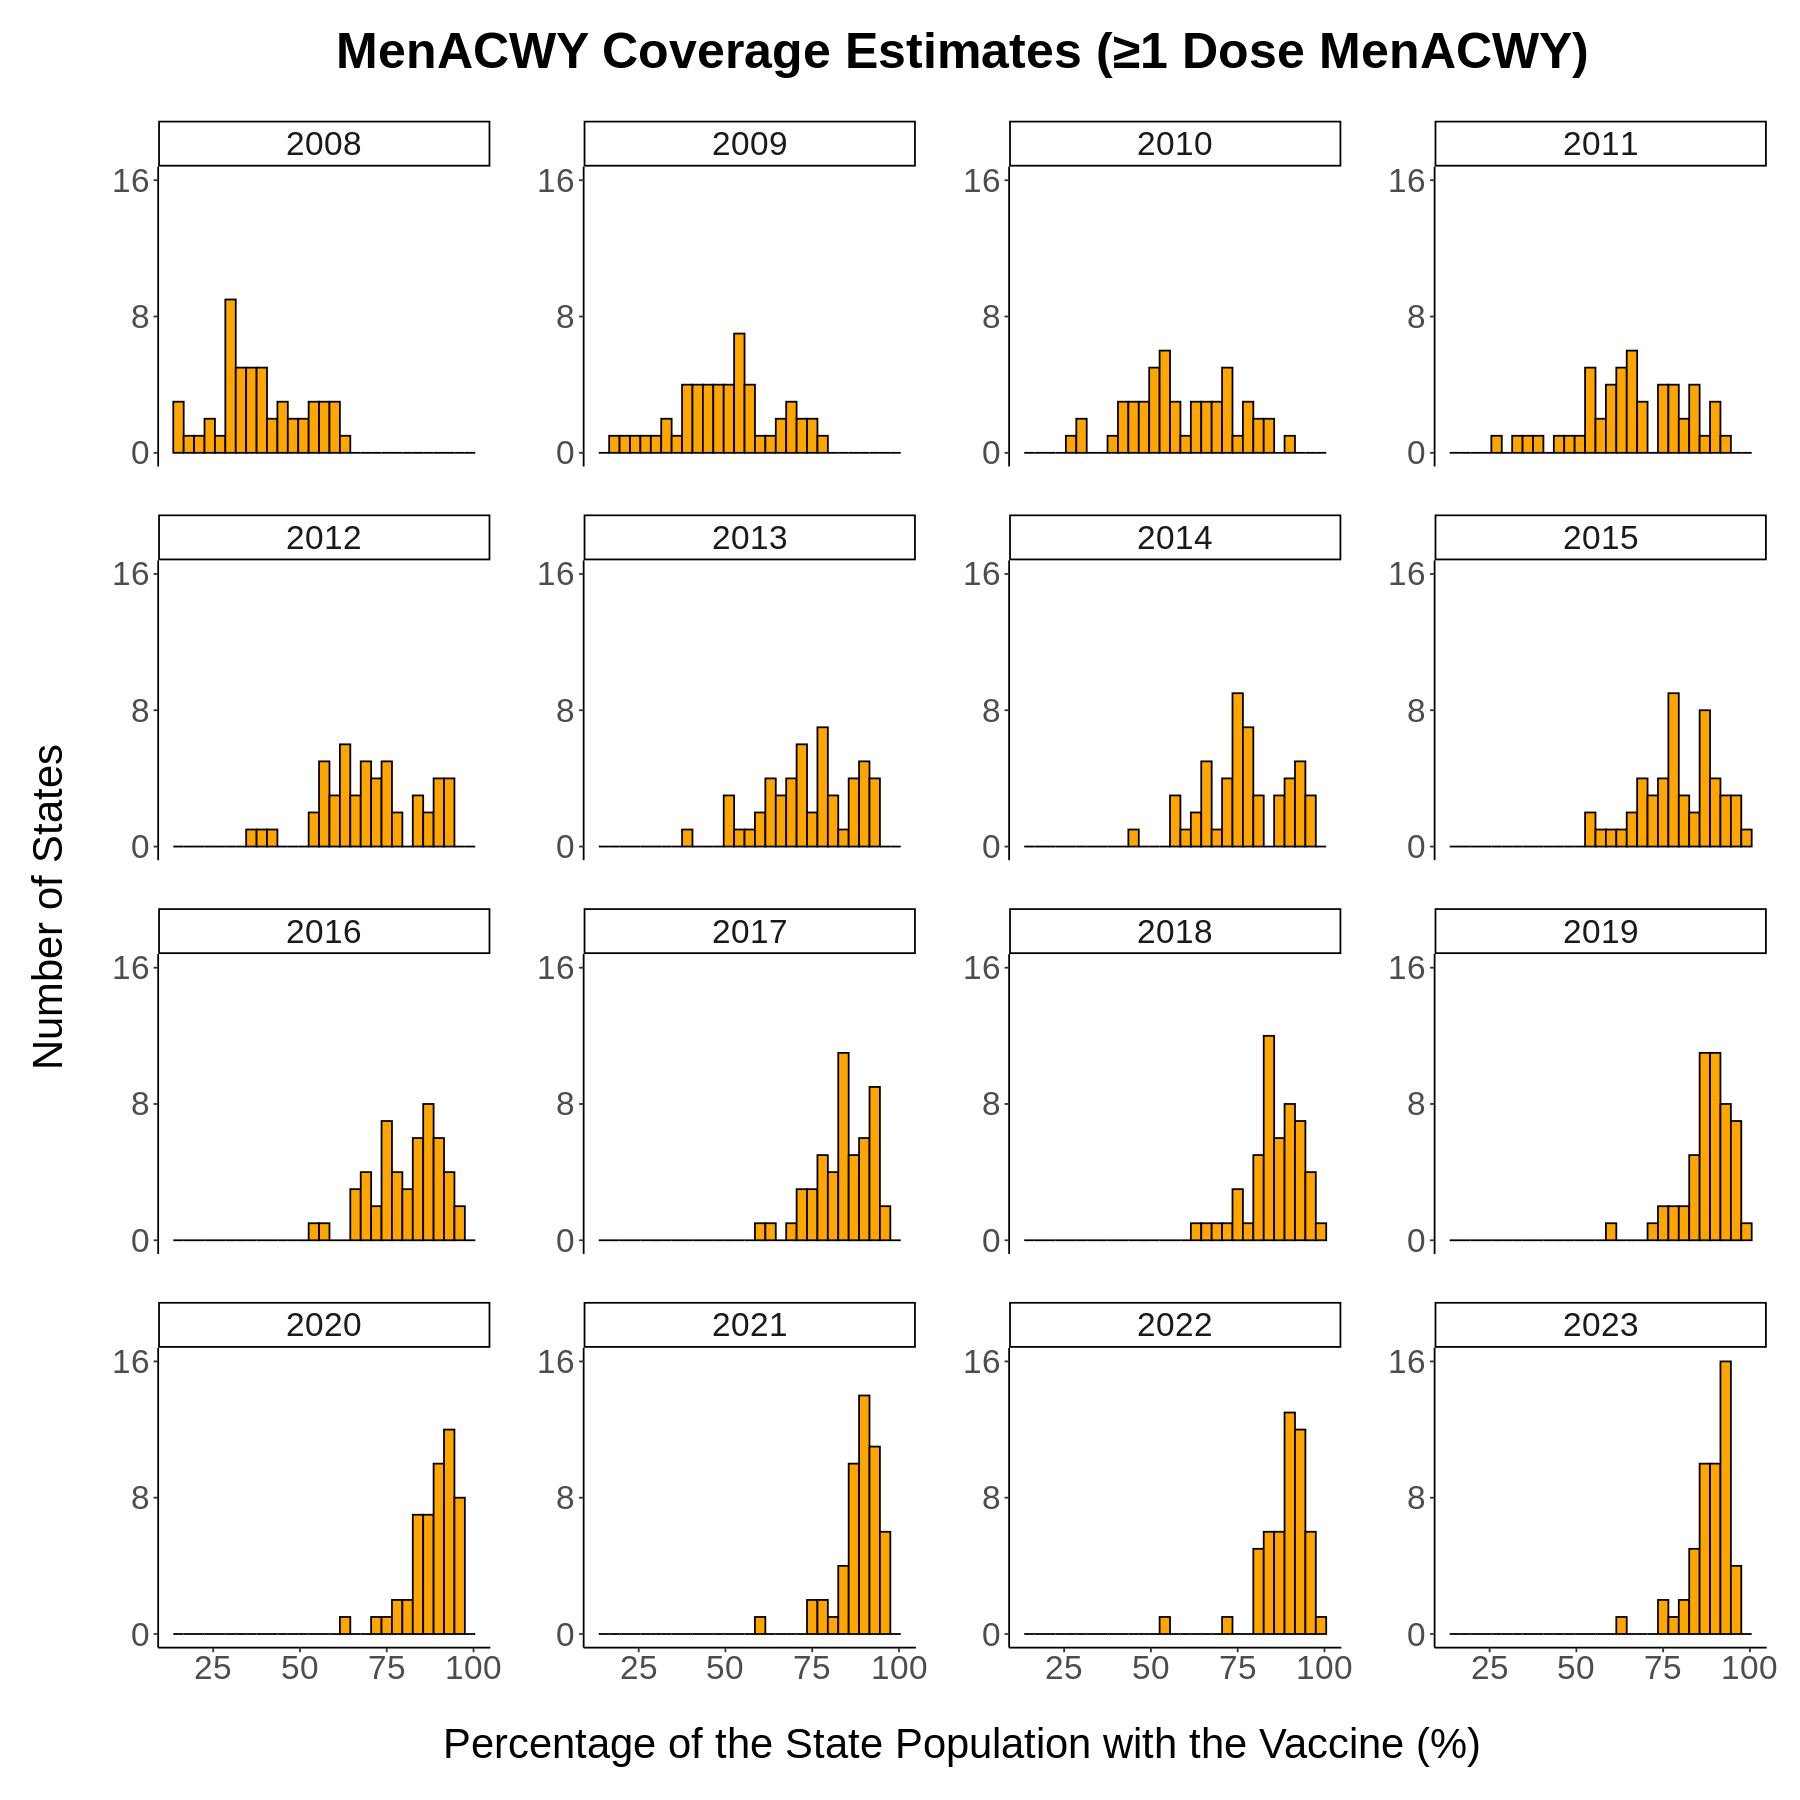

In [19]:
# Create MenACWY histograms with discrete y-axis
ggplot(menacwy, aes(x = coverage_estimate)) +
  geom_histogram(binwidth = 3, fill = "orange", color = "black") +
  labs(title = "MenACWY Coverage Estimates (≥1 Dose MenACWY)",
       x = "Percentage of the State Population with the Vaccine (%)",
       y = "Number of States") +
  theme_classic() +
  theme(text = element_text(size = 25),
        plot.title = element_text(hjust = 0.5, face = "bold", margin = margin(b = 25)),
        panel.spacing = unit(2, "lines"),
        plot.margin = margin(20, 20, 20, 20),
        axis.title.x = element_text(margin = margin(t = 25)),
        axis.title.y = element_text(margin = margin(r = 25))) +
  facet_wrap(~ year_season, scales = "free_y") +
  scale_y_continuous(breaks = c(0, 8, 16),
                     limits = c(0, 16),
                     labels = c("0", "8", "16"))

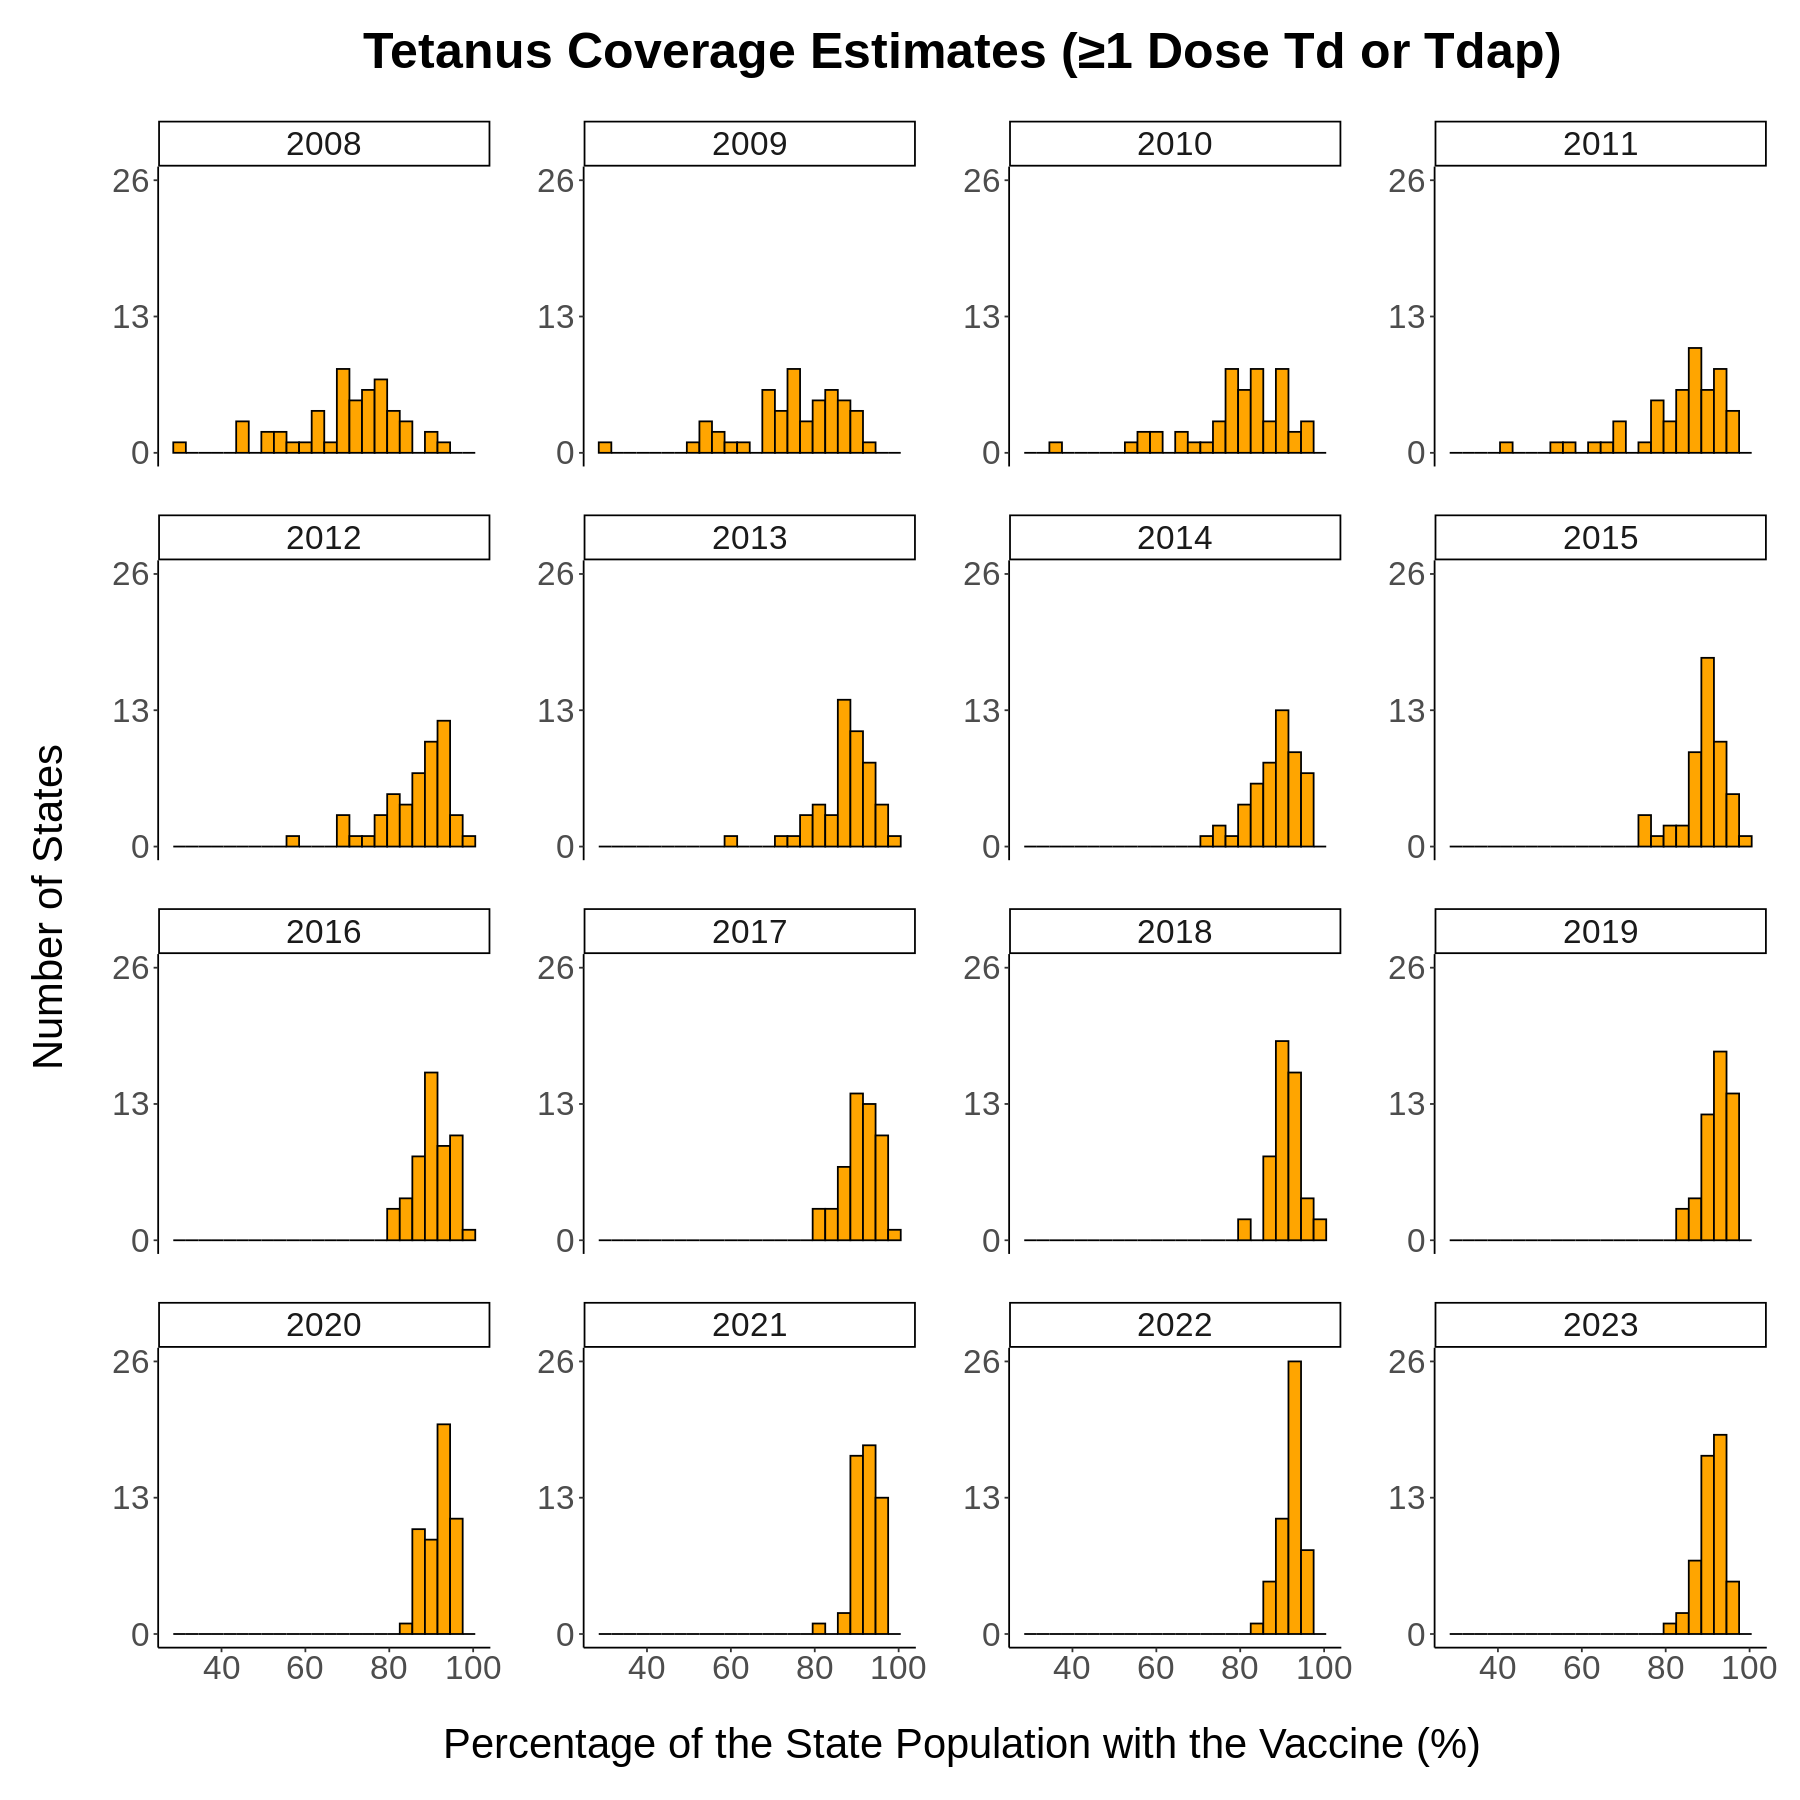

In [20]:
# Create MenACWY histograms with discrete y-axis
ggplot(tetanus, aes(x = coverage_estimate)) +
  geom_histogram(binwidth = 3, fill = "orange", color = "black") +
  labs(title = "Tetanus Coverage Estimates (≥1 Dose Td or Tdap)",
       x = "Percentage of the State Population with the Vaccine (%)",
       y = "Number of States") +
  theme_classic() +
  theme(text = element_text(size = 25),
        plot.title = element_text(hjust = 0.5, face = "bold", margin = margin(b = 25)),
        panel.spacing = unit(2, "lines"),
        plot.margin = margin(20, 20, 20, 20),
        axis.title.x = element_text(margin = margin(t = 25)),
        axis.title.y = element_text(margin = margin(r = 25))) +
  facet_wrap(~ year_season, scales = "free_y") +
  scale_y_continuous(breaks = c(0, 13, 26),
                     limits = c(0, 26),
                     labels = c("0", "13", "26"))

In [21]:
# Read Influenza data
# dev.socrata.com/foundry/data.cdc.gov/vh55-3he6
# data.cdc.gov/Flu-Vaccinations/Influenza-Vaccination-Coverage-for-All-Ages-6-Mont/vh55-3he6
influenza = read.socrata("https://data.cdc.gov/resource/vh55-3he6.json")

# Print Influenza data dimensions
dim(influenza)

# Print first 6 data lines
head(influenza)

[1] 217585     11

,vaccine,geography_type,geography,fips,year_season,month,dimension_type,dimension,coverage_estimate,X_95_ci,population_sample_size
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2017-18,1,6 Months - 17 Years,Medical Setting,88.9,86.3 to 91.1,1060
2,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2020-21,1,6 Months - 17 Years,Medical Setting,79.1,75.9 to 82.0,1253
3,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2017-18,1,6 Months - 17 Years,Pharmacy/Store,8.4,6.5 to 10.8,1060
4,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2020-21,1,6 Months - 17 Years,Pharmacy/Store,18.2,15.5 to 21.3,1253
5,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2018-19,1,Age,50-64 Years,46.8,32.1 to 61.5 ‡,115
6,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2018-19,2,Age,50-64 Years,50.1,34.8 to 65.4 ‡,115


In [22]:
# Create a logical vector to identify where coercion will result in NA
# BEFORE actually converting the column to numeric
problematic_values = is.na(as.numeric(influenza$coverage_estimate))

# Show the original values that became NA and see if they are relevant
influenza[problematic_values, ]

Warning message:
“NAs introduced by coercion”


,vaccine,geography_type,geography,fips,year_season,month,dimension_type,dimension,coverage_estimate,X_95_ci,population_sample_size
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
9,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2019-20,7,Age,50-64 Years,NR †,NR †,94
11,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2019-20,8,Age,50-64 Years,NR †,NR †,94
18,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2019-20,9,Age,50-64 Years,NR †,NR †,94
30,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2020-21,8,Age,50-64 Years,NR †,NR †,76
42,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2021-22,9,Age,50-64 Years,NR †,NR †,94
43,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2021-22,8,Age,50-64 Years,NR †,NR †,94
51,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2017-18,7,Age,18-64 Years not at High Risk,NR †,NR †,175
52,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2017-18,8,Age,18-64 Years not at High Risk,NR †,NR †,175
53,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2017-18,9,Age,18-64 Years not at High Risk,NR †,NR †,175


In [23]:
# There are too many to see. Print the geography values
# and the dimension values to see if this is an issue
unique(influenza[problematic_values, ]$geography)

unique(influenza[problematic_values, ]$dimension)

[1] "TX-Bexar County"      "TX-City of Houston"   "Region 1"            
 [4] "Ohio"                 "Oklahoma"             "Region 6"            
 [7] "United States"        "Vermont"              "Montana"             
[10] "Nebraska"             "PA-Philadelphia"      "PA-Rest of state"    
[13] "Iowa"                 "Guam"                 "Kentucky"            
[16] "Arkansas"             "Alabama"              "Louisiana"           
[19] "Maine"                "Indiana"              "Connecticut"         
[22] "Texas"                "Alaska"               "Minnesota"           
[25] "Idaho"                "California"           "Rhode Island"        
[28] "South Dakota"         "Virginia"             "Tennessee"           
[31] "Colorado"             "Hawaii"               "Delaware"            
[34] "Region 7"             "Maryland"             "Wyoming"             
[37] "Region 9"             "Florida"              "Utah"                
[40] "Massachusetts"        "Michigan"             "South Carolina"      
[43] "Oregon"               "Kansas"               "New York"            
[46] "Region 2"             "NY-City of New York"  "North Dakota"        
[49] "District of Columbia" "Region 4"             "TX-Rest of state"    
[52] "New Mexico"           "Washington"           "IL-City of Chicago"  
[55] "IL-Rest of state"     "Georgia"              "Arizona"             
[58] "Region 3"             "Pennsylvania"         "Region 5"            
[61] "Illinois"             "West Virginia"        "Wisconsin"           
[64] "NY-Rest of state"     "North Carolina"       "New Jersey"          
[67] "Missouri"             "Mississippi"          "New Hampshire"       
[70] "Region 10"            "Nevada"               "Puerto Rico"         
[73] "U.S. Virgin Islands"  "Region 8"

[1] "50-64 Years"                                   
 [2] "18-64 Years not at High Risk"                  
 [3] "18-49 Years at High Risk"                      
 [4] ">=65 Years"                                    
 [5] "18-49 Years"                                   
 [6] "18-49 Years not at High Risk"                  
 [7] "18-64 Years at High Risk"                      
 [8] "18-64 Years"                                   
 [9] ">=18 Years"                                    
[10] "13-17 Years"                                   
[11] "6 Months - 4 Years"                            
[12] "5-12 Years"                                    
[13] "Greater than 18 Years flu"                     
[14] "Greater 65"                                    
[15] "Other or Multiple Races, Non-Hispanic"         
[16] "Black, Non-Hispanic"                           
[17] "White, Non-Hispanic"                           
[18] "Hispanic"                                      
[19] "6 Months - 17 Years"                           
[20] "Asian, Non-Hispanic"                           
[21] ">=6 Months"                                    
[22] "American Indian or Alaska Native, Non-Hispanic"
[23] "Non-Medical Setting"                           
[24] "School"                                        
[25] "Greater than 6 Months flu"                     
[26] "Pharmacy/Store"                                
[27] "25-64 Years at High Risk"                      
[28] "25-64 Years not in Initial Target Group"

In [24]:
# They do not appear to be relevant, because we do not care about either
# their region or their age group/dimension. Move onwards!
# Convert coverage_estimate to numeric
influenza$coverage_estimate = as.numeric(influenza$coverage_estimate)

# Print unique vaccines
unique(influenza$vaccine)

Warning message:
“NAs introduced by coercion”


[1] "Seasonal Influenza"                         
[2] "Influenza A (H1N1) 2009 Monovalent"         
[3] "Any Influenza Vaccination, Seasonal or H1N1"

In [25]:
# Filter influenza
influenza = influenza[influenza$vaccine == "Seasonal Influenza", ]

# Print influenza dimensions
dim(influenza)

[1] 203127     11

In [26]:
# Print unique dimension types
unique(influenza$dimension_type)

[1] "6 Months - 17 Years" "Age"                 ">=18 Years"         
[4] "Race and Ethnicity"  "18-49 Years"         ">=65 Years"         
[7] "50-64 Years"         "18-64 Years"

In [27]:
# Filter influenza
influenza = influenza[influenza$dimension_type == "Age", ]

# Print influenza dimensions
dim(influenza)

[1] 152698     11

In [28]:
# Print unique dimensions
unique(influenza$dimension)

[1] "50-64 Years"                  "18-64 Years at High Risk"    
 [3] "18-64 Years not at High Risk" "18-49 Years at High Risk"    
 [5] ">=65 Years"                   "18-49 Years"                 
 [7] "18-49 Years not at High Risk" "6 Months - 4 Years"          
 [9] ">=18 Years"                   "18-64 Years"                 
[11] "13-17 Years"                  "5-12 Years"                  
[13] "6 Months - 17 Years"          "Greater than 18 Years flu"   
[15] "Greater 65"                   ">=6 Months"                  
[17] "Greater than 6 Months flu"

In [29]:
# Filter influenza
influenza = influenza[influenza$dimension == "13-17 Years", ]

# Print influenza dimensions
dim(influenza)

[1] 10265    11

In [30]:
# Print first 6 influenza lines
head(influenza)

,vaccine,geography_type,geography,fips,year_season,month,dimension_type,dimension,coverage_estimate,X_95_ci,population_sample_size
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
379,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2017-18,7,Age,13-17 Years,NA,NR †,521
381,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2017-18,8,Age,13-17 Years,10.6,5.3 to 15.9,521
475,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2021-22,5,Age,13-17 Years,53.0,47.1 to 58.9,673
478,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2021-22,1,Age,13-17 Years,49.1,43.8 to 54.4,673
479,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2021-22,2,Age,13-17 Years,51.0,45.4 to 56.6,673
480,Seasonal Influenza,States/Local Areas,TX-Bexar County,151,2021-22,3,Age,13-17 Years,52.2,46.5 to 57.9,673


In [31]:
# Print unique geography types
unique(influenza$geography_type)

[1] "States/Local Areas"   "HHS Regions/National"

In [32]:
# Filter influenza
influenza = influenza[influenza$geography_type == "States/Local Areas", ]

# Print influenza dimensions
dim(influenza)

[1] 8593   11

In [33]:
# Print unique geographies
unique(influenza$geography)

[1] "TX-Bexar County"      "Ohio"                 "Oklahoma"            
 [4] "Vermont"              "Montana"              "PA-Philadelphia"     
 [7] "PA-Rest of state"     "Iowa"                 "Nebraska"            
[10] "Guam"                 "Kentucky"             "Arkansas"            
[13] "Alabama"              "Louisiana"            "Indiana"             
[16] "Connecticut"          "Texas"                "Alaska"              
[19] "Minnesota"            "Idaho"                "California"          
[22] "Rhode Island"         "South Dakota"         "Maine"               
[25] "Virginia"             "Tennessee"            "Colorado"            
[28] "Hawaii"               "Delaware"             "Maryland"            
[31] "Wyoming"              "Florida"              "Utah"                
[34] "Massachusetts"        "South Carolina"       "Michigan"            
[37] "Oregon"               "Kansas"               "New York"            
[40] "NY-City of New York"  "North Dakota"         "District of Columbia"
[43] "TX-City of Houston"   "TX-Rest of state"     "New Mexico"          
[46] "Washington"           "IL-City of Chicago"   "IL-Rest of state"    
[49] "Pennsylvania"         "Illinois"             "West Virginia"       
[52] "Arizona"              "NY-Rest of state"     "North Carolina"      
[55] "New Jersey"           "Missouri"             "Mississippi"         
[58] "Georgia"              "New Hampshire"        "Wisconsin"           
[61] "Nevada"               "Puerto Rico"          "U.S. Virgin Islands"

In [34]:
# List of all 50 states and the District of Columbia
# These are areas with electoral college votes in the 2024 election
# www.archives.gov/electoral-college/2024
states = c("Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
            "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana",
            "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts",
            "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
            "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
            "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island",
            "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
            "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming", "District of Columbia")

# Filter influenza for all 50 states and the District of Columbia
influenza = influenza[influenza$geography %in% states, ]

# Print influenza dimensions
dim(influenza)

[1] 7735   11

In [35]:
# Print unique year seasons
unique(influenza$year_season)

[1] "2023-24" "2014-15" "2015-16" "2016-17" "2017-18" "2013-14" "2012-13"
 [8] "2022-23" "2019-20" "2021-22" "2020-21" "2018-19" "2011-12" "2010-11"

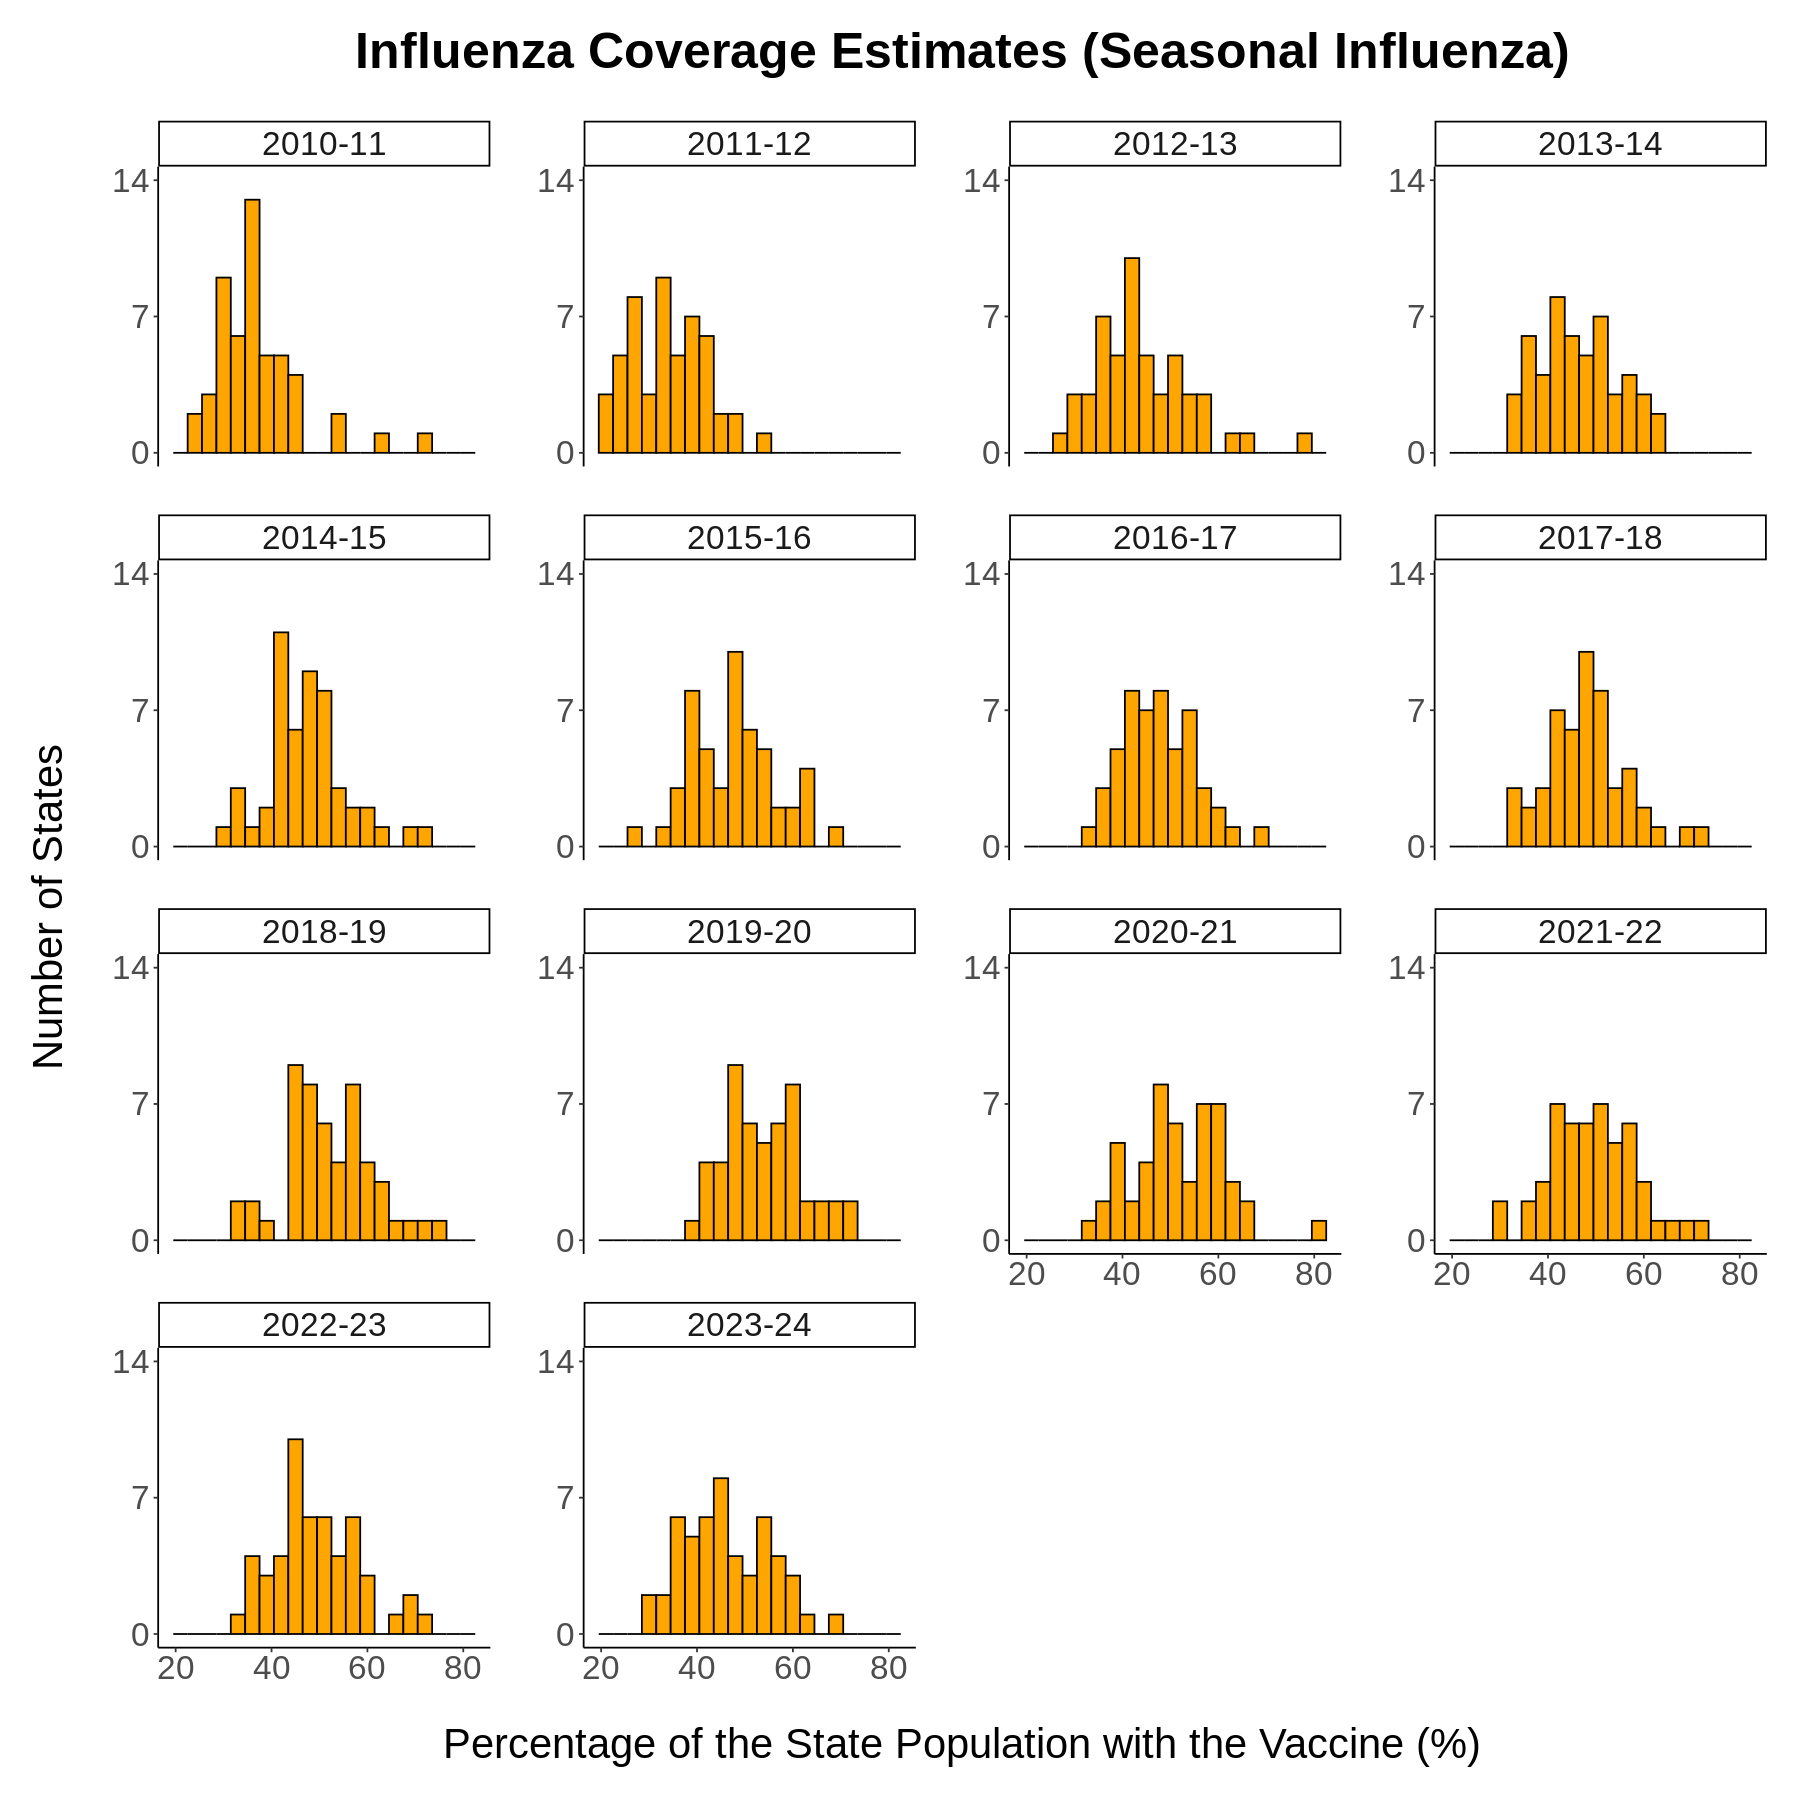

In [36]:
# For the histograms, filter by month and choose only month 5.
# May is the end of the season, and it will therefore have the
# highest vaccination coverage estimate.
# Create Influenza histograms with discrete y-axis
ggplot(influenza[influenza$month == "5", ], aes(x = coverage_estimate)) +
  geom_histogram(binwidth = 3, fill = "orange", color = "black") +
  labs(title = "Influenza Coverage Estimates (Seasonal Influenza)",
       x = "Percentage of the State Population with the Vaccine (%)",
       y = "Number of States") +
  theme_classic() +
  theme(text = element_text(size = 25),
        plot.title = element_text(hjust = 0.5, face = "bold", margin = margin(b = 25)),
        panel.spacing = unit(2, "lines"),
        plot.margin = margin(20, 20, 20, 20),
        axis.title.x = element_text(margin = margin(t = 25)),
        axis.title.y = element_text(margin = margin(r = 25))) +
  facet_wrap(~ year_season, scales = "free_y") +
  scale_y_continuous(breaks = c(0, 7, 14),
                     limits = c(0, 14),
                     labels = c("0", "7", "14"))